# Testing the GO term reduncancy reduction pipeline with all transporters from Uniprot

In [1]:
from subpred.util import load_df
import networkx as nx
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(rc={"figure.figsize": (10, 6)})
pd.set_option('display.max_rows', 500)


Some parameters:

In [2]:
ORGANISM_IDS = None  # {559292}  # TODO clustering, adjust parameters
# ORGANISM_IDS = None
SWISSPROT_ONLY = False  # does not make a difference for yeast
MAX_SEQUENCE_EVIDENCE_CODE = 2
EXCLUDE_IEA_GO_TERMS = False
REMOVE_PROTEINS_WITHOUT_GENE_NAMES = False  # Does not make a difference for yeast

Creating the dataset, first without clustering and with transcript-only data:

In [3]:
from subpred.transmembrane_transporters import get_transmembrane_transporter_dataset

# With organisms other than yeast, it might be interesting to cluster at 100% sequence similarity at the beginning
df_sequences, df_uniprot_goa, df_go_chebi = get_transmembrane_transporter_dataset(
    organism_ids=ORGANISM_IDS,
    swissprot_only=SWISSPROT_ONLY,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=EXCLUDE_IEA_GO_TERMS,
    max_sequence_evidence_code=MAX_SEQUENCE_EVIDENCE_CODE,
    remove_proteins_without_gene_names=REMOVE_PROTEINS_WITHOUT_GENE_NAMES,
)
display(df_sequences)
display(df_uniprot_goa)
display(df_go_chebi)

,sequence,reviewed,protein_existence,organism_id,protein_names
Uniprot,,,,,
B7U540,MTAASRANPYSIVSLEEDGLHLVTMSGANGFGNGKVHTRRRCRNRF...,True,1,9606,Inward rectifier potassium channel 18 (Inward ...
O00168,MASLGHILVFCVGLLTMAKAESPKEHDPFTYDYQSLQIGGLVIAGI...,True,1,9606,Phospholemman (FXYD domain-containing ion tran...
O00337,MENDPSRRRESISLTPVAKGLENMGADFLESLEEGQLPRSDLSPAE...,True,1,9606,Sodium/nucleoside cotransporter 1 (Concentrati...
O00400,MSPTISHKDSSRQRRPGNFSHSLDMKSGPLPPGGWDDSHLDSAGRE...,True,1,9606,Acetyl-coenzyme A transporter 1 (AT-1) (Acetyl...
O14925,MEGGGGSGNKTTGGLAGFFGAGGAGYSHADLAGVPLTGMNPLSPYL...,True,1,9606,Mitochondrial import inner membrane translocas...
...,...,...,...,...,...
X5IHB7,MGPLHVPSSSPQHSKLQRVYHLLLFHVHPFWVQLLYFLFISLFGFL...,False,2,29695,Sodium transporter HKT15
X5II77,MGPLHVPSSSPQHSKLQRVYRLLLFHVHPFWIQLLYFLFISLFGFL...,False,2,29695,Sodium transporter HKT15
X5IYJ3,MGPLHVPSSSPQHSKLQRVYHLLLFHVHPFWVQLLYFLFISLFGFL...,False,2,29695,Sodium transporter HKT15


,Uniprot,qualifier,go_id,go_term,evidence_code,aspect,go_id_ancestor,go_term_ancestor
0,A0A014M993,enables,GO:0015288,porin activity,IEA,F,GO:0022803,passive transmembrane transporter activity
1,A0A014M993,enables,GO:0015288,porin activity,IEA,F,GO:0022857,transmembrane transporter activity
2,A0A014M993,enables,GO:0015288,porin activity,IEA,F,GO:0015288,porin activity
3,A0A014M993,enables,GO:0015288,porin activity,IEA,F,GO:0022829,wide pore channel activity
4,A0A014M993,enables,GO:0015288,porin activity,IEA,F,GO:0015267,channel activity
...,...,...,...,...,...,...,...,...
1005409,Z4YKJ7,enables,GO:0015501,glutamate:sodium symporter activity,IEA,F,GO:0008324,monoatomic cation transmembrane transporter ac...
1005410,Z4YKJ7,enables,GO:0015501,glutamate:sodium symporter activity,IEA,F,GO:0015370,solute:sodium symporter activity
1005411,Z4YKJ7,enables,GO:0015501,glutamate:sodium symporter activity,IEA,F,GO:0042887,amide transmembrane transporter activity
1005412,Z4YKJ7,enables,GO:0015501,glutamate:sodium symporter activity,IEA,F,GO:0015294,solute:monoatomic cation symporter activity


,go_id,go_term,chebi_id,chebi_term,chebi_go_relation,chebi_id_ancestor,chebi_term_ancestor
0,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:36357,polyatomic entity
1,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:33579,main group molecular entity
2,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:24870,ion
3,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:35238,amino acid zwitterion
4,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:27369,zwitterion
...,...,...,...,...,...,...,...
24871,GO:1905948,"ABC-type 3',5'-cyclic GMP transmembrane transp...",CHEBI:57746,"3',5'-cyclic GMP(1-)",has_primary_input,CHEBI:36359,phosphorus oxoacid derivative
24872,GO:1905948,"ABC-type 3',5'-cyclic GMP transmembrane transp...",CHEBI:57746,"3',5'-cyclic GMP(1-)",has_primary_input,CHEBI:50860,organic molecular entity
24873,GO:1905948,"ABC-type 3',5'-cyclic GMP transmembrane transp...",CHEBI:57746,"3',5'-cyclic GMP(1-)",has_primary_input,CHEBI:23367,molecular entity
24874,GO:1905948,"ABC-type 3',5'-cyclic GMP transmembrane transp...",CHEBI:57746,"3',5'-cyclic GMP(1-)",has_primary_input,CHEBI:24431,chemical entity


### Analysis

In [4]:
import numpy as np
import pandas as pd
from subpred.cdhit import cd_hit
from subpred.util import load_df


def get_stats(df_sequences, df_uniprot_goa):

    df_sequences_merge = df_sequences.join(load_df("uniprot")["gene_names"], how="left")
    df_sequences_merge["has_gene_name"] = ~df_sequences_merge.gene_names.isnull()
    df_sequences_merge = df_sequences_merge.drop(
        ["gene_names", "protein_names"], axis=1
    )

    df_sequences_merge = df_sequences_merge.reset_index().drop_duplicates()
    df_sequences_merge

    df_sequences_goa_merged = pd.merge(
        df_sequences_merge[
            ["Uniprot", "reviewed", "protein_existence", "has_gene_name"]
        ],
        df_uniprot_goa[["Uniprot", "evidence_code", "go_term_ancestor"]],
        on="Uniprot",
        how="inner",
    )
    df_sequences_goa_merged
    df_sequences_goa_merged["evidence_code"] = df_sequences_goa_merged[
        "evidence_code"
    ].transform(lambda x: "computational" if x == "IEA" else "experiment")
    df_sequences_goa_merged["protein_existence_evidence"] = df_sequences_goa_merged[
        "protein_existence"
    ].map({1: "protein_level", 2: "transcript_level"})
    df_sequences_goa_merged = df_sequences_goa_merged.drop("protein_existence", axis=1)
    df_sequences_goa_merged["clustering"] = "None"

    for thresh in [50, 70, 90, 100]:
        cluster_representatives = cd_hit(
            df_sequences.sequence, identity_threshold=thresh, n_threads=-1
        )

        df_sequences_goa_merged_clustered = (
            df_sequences_goa_merged[
                df_sequences_goa_merged.Uniprot.isin(cluster_representatives)
            ]
            .drop("clustering", axis=1)
            .assign(clustering=thresh)
            .drop_duplicates()
        )

        df_sequences_goa_merged = pd.concat(
            [df_sequences_goa_merged, df_sequences_goa_merged_clustered]
        ).reset_index(drop=True)
    df_sequences_goa_merged = df_sequences_goa_merged.rename(
        columns={
            "evidence_code": "go_evidence",
            "reviewed": "swissprot_reviewed",
            "go_term_ancestor": "go_term",
        }
    )

    df_sequences_goa_merged = df_sequences_goa_merged.drop_duplicates()

    df_stats_transporters = (
        df_sequences_goa_merged.drop("go_term", axis=1)
        .drop_duplicates()
        .groupby(
            [
                "swissprot_reviewed",
                "has_gene_name",
                "go_evidence",
                "protein_existence_evidence",
                "clustering",
            ]
        )
        .apply(np.unique)
        .apply(len)
        .to_frame("n_transporters")
    )

    df_stats_go = (
        df_sequences_goa_merged.drop("Uniprot", axis=1)
        .drop_duplicates()
        .groupby(
            [
                "swissprot_reviewed",
                "has_gene_name",
                "go_evidence",
                "protein_existence_evidence",
                "clustering",
            ]
        )
        .apply(np.unique)
        .apply(len)
        .to_frame("n_terms")
    )
    return df_stats_transporters.join(df_stats_go)

In [5]:
df_stats_uniprot = get_stats(df_sequences, df_uniprot_goa)

cd-hit: clustered .......... sequences into finished clusters at threshold 50
cd-hit: clustered .......... sequences into finished clusters at threshold 70
cd-hit: clustered .......... sequences into finished clusters at threshold 90
cd-hit: clustered .......... sequences into finished clusters at threshold 100


In [6]:
df_sequences_four = df_sequences[df_sequences.organism_id.isin([3702, 9606, 83333, 559292])]
df_uniprot_goa_four = df_uniprot_goa[df_uniprot_goa.Uniprot.isin(df_sequences_four.index)].reset_index(drop=True)
df_stats_four = get_stats(df_sequences_four, df_uniprot_goa_four)

cd-hit: clustered 5837 sequences into 2230 clusters at threshold 50
cd-hit: clustered 5837 sequences into 2842 clusters at threshold 70
cd-hit: clustered 5837 sequences into 3496 clusters at threshold 90
cd-hit: clustered 5837 sequences into 5226 clusters at threshold 100


In [7]:
df_stats_four.rename(
    columns={"n_transporters": "n_transporters_four", "n_terms": "n_terms_four"}
).join(
    df_stats_uniprot.rename(
        columns={"n_transporters": "n_transporters_all", "n_terms": "n_terms_all"}
    )
)[["n_transporters_four","n_transporters_all",	"n_terms_four",	"n_terms_all"]]

n_transporters_four  \
swissprot_reviewed has_gene_name go_evidence   protein_existence_evidence clustering                        
False              False         computational protein_level              50                            1   
                                                                          70                            1   
                                                                          90                            5   
                                                                          100                           9   
                                                                          None                          9   
                                               transcript_level           50                           61   
                                                                          70                           77   
                                                                          90                          145   
                                                                          100                         648   
                                                                          None                        751   
                                 experiment    transcript_level           50                            1   
                                                                          70                            1   
                                                                          90                            1   
                                                                          100                           2   
                                                                          None                          3   
                   True          computational protein_level              50                          188   
                                                                          70                          262   
                                                                          90                          456   
                                                                          100                        1080   
                                                                          None                       1294   
                                               transcript_level           50                           44   
                                                                          70                           65   
                                                                          90                          119   
                                                                          100                         538   
                                                                          None                        789   
                                 experiment    protein_level              50                           24   
                                                                          70                           26   
                                                                          90                           31   
                                                                          100                          34   
                                                                          None                         34   
                                               transcript_level           50                            1   
                                                                          70                            2   
                                                                          90                            3   
                                                                          100                           6   
                                                                          None                          7   
True               True          computational protei

Using the best data, as there seem to be enough samples:

In [8]:
from subpred.transmembrane_transporters import get_transmembrane_transporter_dataset

df_sequences, df_uniprot_goa, df_go_chebi = get_transmembrane_transporter_dataset(
    organism_ids=[3702, 9606, 83333, 559292],
    swissprot_only=True,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=True,
    max_sequence_evidence_code=1,
    remove_proteins_without_gene_names=True,
)
display(df_sequences)
display(df_uniprot_goa)
display(df_go_chebi)

# TODO clustering

,sequence,reviewed,protein_existence,organism_id,protein_names
Uniprot,,,,,
B7U540,MTAASRANPYSIVSLEEDGLHLVTMSGANGFGNGKVHTRRRCRNRF...,True,1,9606,Inward rectifier potassium channel 18 (Inward ...
O00168,MASLGHILVFCVGLLTMAKAESPKEHDPFTYDYQSLQIGGLVIAGI...,True,1,9606,Phospholemman (FXYD domain-containing ion tran...
O00337,MENDPSRRRESISLTPVAKGLENMGADFLESLEEGQLPRSDLSPAE...,True,1,9606,Sodium/nucleoside cotransporter 1 (Concentrati...
O00400,MSPTISHKDSSRQRRPGNFSHSLDMKSGPLPPGGWDDSHLDSAGRE...,True,1,9606,Acetyl-coenzyme A transporter 1 (AT-1) (Acetyl...
O14925,MEGGGGSGNKTTGGLAGFFGAGGAGYSHADLAGVPLTGMNPLSPYL...,True,1,9606,Mitochondrial import inner membrane translocas...
...,...,...,...,...,...
P38318,MEPKRKSGSLAKHDLPQFYLLIMLYLAQGIPVGLAFGTVPFLLKSL...,True,1,559292,Uncharacterized membrane protein YBR220C
P39282,MPHTIKKMSLIGLILMIFTSVFGFANSPSAYYLMGYSAIPFYIFSA...,True,1,83333,Inner membrane transporter YjeM
P46996,MSNEDETTRLMSSDEMDYLLETAGINALEEIISQNDSTGINLDTNE...,True,1,559292,Uncharacterized membrane protein YJL163C


,Uniprot,qualifier,go_id,go_term,evidence_code,aspect,go_id_ancestor,go_term_ancestor
0,A0AV02,enables,GO:0015379,potassium:chloride symporter activity,IBA,F,GO:0015296,monoatomic anion:monoatomic cation symporter a...
1,A0AV02,enables,GO:0015379,potassium:chloride symporter activity,IBA,F,GO:0022890,inorganic cation transmembrane transporter act...
2,A0AV02,enables,GO:0015379,potassium:chloride symporter activity,IBA,F,GO:0015293,symporter activity
3,A0AV02,enables,GO:0015379,potassium:chloride symporter activity,IBA,F,GO:0022804,active transmembrane transporter activity
4,A0AV02,enables,GO:0015379,potassium:chloride symporter activity,IBA,F,GO:0015103,inorganic anion transmembrane transporter acti...
...,...,...,...,...,...,...,...,...
51303,Q9ZWT3,enables,GO:0005315,inorganic phosphate transmembrane transporter ...,ISS,F,GO:0015318,inorganic molecular entity transmembrane trans...
51304,Q9ZWT3,enables,GO:0005315,inorganic phosphate transmembrane transporter ...,ISS,F,GO:0015291,secondary active transmembrane transporter act...
51305,Q9ZWT3,enables,GO:0005315,inorganic phosphate transmembrane transporter ...,ISS,F,GO:0022857,transmembrane transporter activity
51306,Q9ZWT3,enables,GO:0005315,inorganic phosphate transmembrane transporter ...,ISS,F,GO:0022804,active transmembrane transporter activity


,go_id,go_term,chebi_id,chebi_term,chebi_go_relation,chebi_id_ancestor,chebi_term_ancestor
0,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:36357,polyatomic entity
1,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:33579,main group molecular entity
2,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:24870,ion
3,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:35238,amino acid zwitterion
4,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:27369,zwitterion
...,...,...,...,...,...,...,...
19529,GO:1905201,gibberellin transmembrane transporter activity,CHEBI:24250,gibberellin,has_primary_input,CHEBI:33608,hydrogen molecular entity
19530,GO:1905201,gibberellin transmembrane transporter activity,CHEBI:24250,gibberellin,has_primary_input,CHEBI:36357,polyatomic entity
19531,GO:1905201,gibberellin transmembrane transporter activity,CHEBI:24250,gibberellin,has_primary_input,CHEBI:33304,chalcogen molecular entity
19532,GO:1905201,gibberellin transmembrane transporter activity,CHEBI:24250,gibberellin,has_primary_input,CHEBI:26873,terpenoid


In [9]:
from subpred.cdhit import cd_hit
cluster_representatives_70 = cd_hit(df_sequences.sequence, identity_threshold=70)

df_sequences = df_sequences[df_sequences.index.isin(cluster_representatives_70)]

assert (df_sequences.reviewed == True).all()
assert (df_sequences.protein_existence == True).all()

df_uniprot_goa = df_uniprot_goa[(df_uniprot_goa.Uniprot.isin(cluster_representatives_70))].reset_index(drop=True)

assert (df_uniprot_goa.evidence_code != "IEA").all()
assert (df_uniprot_goa.qualifier == "enables").all()

df_go_chebi = df_go_chebi[df_go_chebi.go_id.isin(df_uniprot_goa.go_id_ancestor)]

cd-hit: clustered 1915 sequences into 1740 clusters at threshold 70


## Pipeline code

Pipe 4:

In [13]:
from subpred.go_redundancy import subset_pipeline, get_go_id_to_proteins
from subpred.go_redundancy import get_go_subset, get_go_id_to_level
from collections import defaultdict

go_id_to_term = {k: v for k, v in load_df("go_obo").nodes(data="name")}
go_id_to_proteins = get_go_id_to_proteins(df_uniprot_goa=df_uniprot_goa)

optimized_subset, scores_after = subset_pipeline(
    df_uniprot_goa,
    df_sequences,
    min_samples_per_term=20,
    max_samples_percentile=99,
    min_unique_samples_per_term=20,
    min_coverage=1.0,
    epsilon_f1=0.0,
    nan_value=-1.0,
    prefer_abstract_terms=False,
    verbose=False,
    excluded_terms=None,
    random_seed=1,
    return_scores=True,
    return_baseline_scores=False,
    dataset_name="uniprot"
)
display(scores_after)

go_id_to_proteins = get_go_id_to_proteins(df_uniprot_goa=df_uniprot_goa)

pd.DataFrame(
    sorted(
        [
            (go_id_to_term[go_id], len(go_id_to_proteins[go_id]))
            for go_id in optimized_subset
        ]
    )
)

coverage          1.000000
mean              0.786997
median            0.842489
std               0.174160
nans             38.000000
subset_length    24.000000
dtype: float64

,0,1
0,amide transmembrane transporter activity,104
1,azole transmembrane transporter activity,22
2,carbohydrate derivative transmembrane transpor...,104
3,carbohydrate transmembrane transporter activity,138
4,channel activity,452
5,efflux transmembrane transporter activity,48
6,inorganic anion transmembrane transporter acti...,156
7,macromolecule transmembrane transporter activity,80
8,magnesium ion transmembrane transporter activity,21
9,nucleobase transmembrane transporter activity,30


what were the scores before optimization?

In [18]:
subset_before, scores_before = subset_pipeline(
    df_uniprot_goa,
    df_sequences,
    min_samples_per_term=20,
    max_samples_percentile=100,
    min_unique_samples_per_term=10,
    min_coverage=0.9,
    epsilon_f1=0.0,
    nan_value=-1.0,
    prefer_abstract_terms=False,
    verbose=False,
    excluded_terms=None,
    random_seed=1,
    return_scores=True,
    return_baseline_scores=True,
    dataset_name="uniprot"
)
scores_before

coverage            1.000000
mean                0.868924
median              0.915944
std                 0.141414
nans             1666.000000
subset_length     137.000000
dtype: float64

How many GO terms before filtering for 20 annotated proteins or more?

In [96]:
len(
    get_go_subset(
        df_uniprot_goa, root_node="GO:0022857", min_samples=None, excluded_terms=None
    )
)

662

What is the distribution of levels among the 36 GO terms? And among the other terms with less then 20 samples?

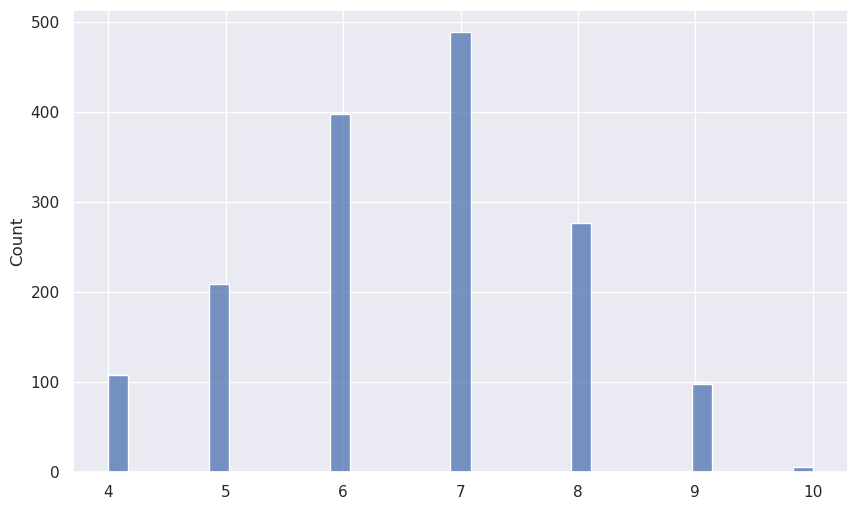

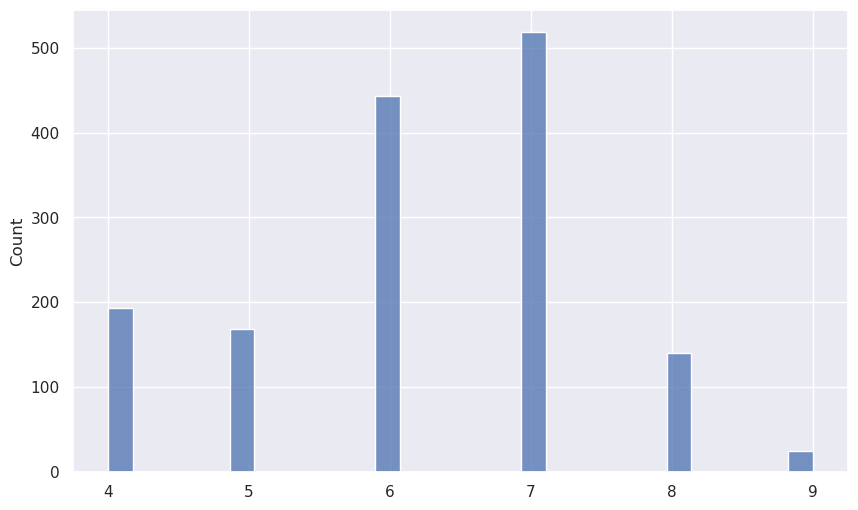

In [97]:
go_id_to_level_all = get_go_id_to_level(
    go_terms_list=df_uniprot_goa.go_id_ancestor, root_node="GO:0003674"
)
protein_to_levels = defaultdict(list)
protein_to_levels_36 = defaultdict(list)
for go_id, protein_set in go_id_to_proteins.items():
    level = go_id_to_level_all[go_id]
    for protein in protein_set:
        protein_to_levels[protein].append(level)
        if go_id in subset_before:
            protein_to_levels_36[protein].append(level)


levels_proteins = [max(levels) for protein, levels in protein_to_levels.items()]
levels_proteins_36 = [max(levels) for protein, levels in protein_to_levels_36.items()]

sns.histplot(levels_proteins)
plt.show()

sns.histplot(levels_proteins_36)
plt.show()

Creating plots of coverage vs. other scores at different values of min_unique_samples_per_term:

In [98]:
from joblib import Parallel, delayed
from sklearn.model_selection import ParameterGrid


def save_params(df_uniprot_goa, df_sequences, **kwargs):
    # wrapper method used for parallelizing evaluation, saves parameters for each iteration
    subset, scores = subset_pipeline(df_uniprot_goa, df_sequences, **kwargs)
    # params = {k:v for k,v in kwargs.items() if }
    return pd.concat([pd.DataFrame.from_dict(kwargs, orient="index"), scores])


recalculate = True
if recalculate:

    param_grid = {
        "prefer_abstract_terms": [True, False],
        "min_unique_samples_per_term": [5, 10, 15, 20],
        "min_coverage": [x / 100 for x in reversed(range(1, 101))][:50],
    }

    res = Parallel(n_jobs=-1, backend="multiprocessing")(
        delayed(save_params)(
            df_uniprot_goa=df_uniprot_goa,
            df_sequences=df_sequences,
            min_samples_per_term=20,
            epsilon_f1=0.0,
            nan_value=-1.0,
            verbose=False,
            excluded_terms=None,
            random_seed=1,
            return_scores=True,
            return_baseline_scores=False,
            dataset_name="uniprot",
            **parameter_set
        )
        for parameter_set in ParameterGrid(param_grid=param_grid)
    )
    df_plot = pd.concat(res, axis=1).transpose().reset_index(drop=True)
    df_plot.to_pickle("df_plot_uniprot.pickle")

else:

    df_plot = pd.read_pickle("df_plot_uniprot.pickle")

df_plot.head()

,min_samples_per_term,epsilon_f1,nan_value,verbose,excluded_terms,random_seed,return_scores,return_baseline_scores,dataset_name,min_coverage,min_unique_samples_per_term,prefer_abstract_terms,coverage,mean,median,std,nans,subset_length
0,20,0.0,-1.0,False,None,1,True,False,uniprot,1.0,5,True,1.0,0.868307,0.904277,0.121849,8.0,46.0
1,20,0.0,-1.0,False,None,1,True,False,uniprot,1.0,5,False,1.0,0.868307,0.904277,0.121849,8.0,46.0
2,20,0.0,-1.0,False,None,1,True,False,uniprot,1.0,10,True,1.0,0.868632,0.904277,0.121156,14.0,46.0
3,20,0.0,-1.0,False,None,1,True,False,uniprot,1.0,10,False,1.0,0.868632,0.904277,0.121156,14.0,46.0
4,20,0.0,-1.0,False,None,1,True,False,uniprot,1.0,15,True,1.0,0.869525,0.9045,0.119977,32.0,46.0


Ignoring prefer_abstract_terms for now (did not have impact on plot):

In [99]:
df_plot_concrete = df_plot[df_plot.prefer_abstract_terms == False]

Plot 1: Coverage vs number of nans vs min unique samples

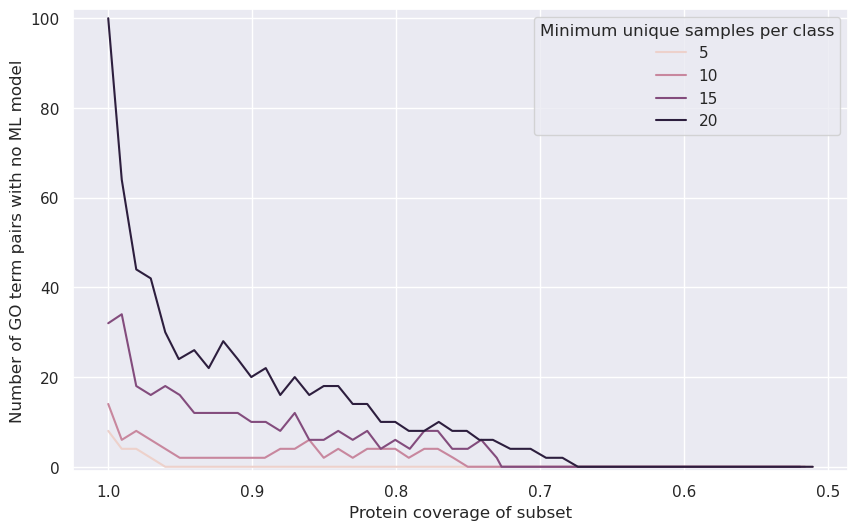

In [100]:
g = sns.lineplot(
    df_plot_concrete, x="coverage", y="nans", hue="min_unique_samples_per_term"
)
g.invert_xaxis()
g.set_ylim((-1, df_plot.nans.max() + 2))
g.set_ylabel("Number of GO term pairs with no ML model")
g.set_xlabel("Protein coverage of subset")
g.legend(title="Minimum unique samples per class")
plt.savefig("nans.png", dpi=300)

Coverage vs. mean F1 score

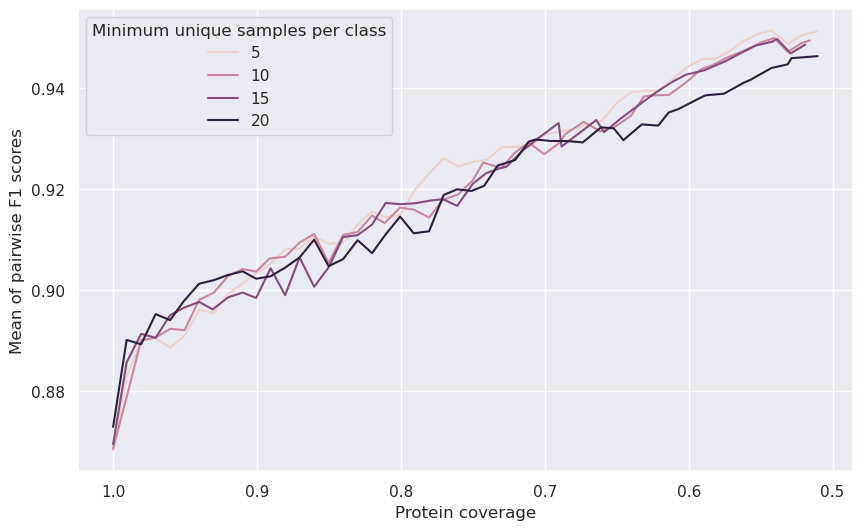

In [101]:
g = sns.lineplot(
    df_plot_concrete, x="coverage", y="mean", hue="min_unique_samples_per_term"
)
g.invert_xaxis()
g.set_xlabel("Protein coverage")
g.set_ylabel("Mean of pairwise F1 scores")
g.legend(title="Minimum unique samples per class")
plt.savefig("mean.png", dpi=300)

Coverage vs median f1 score

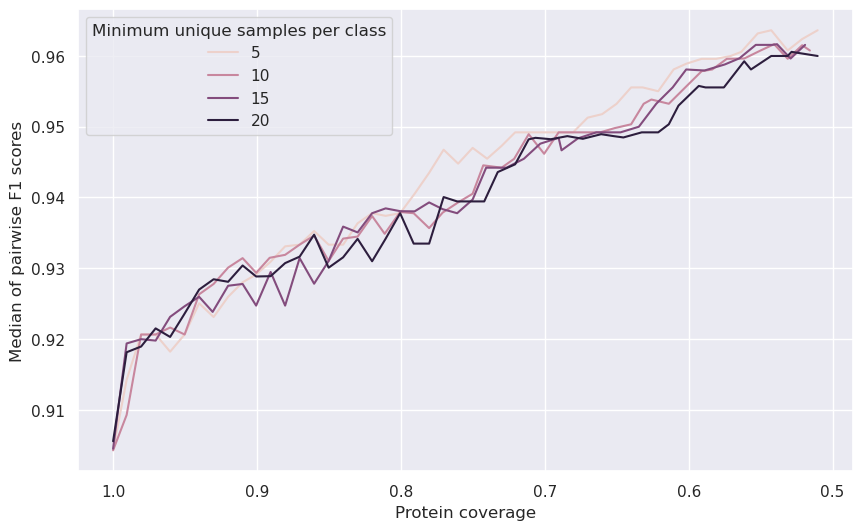

In [102]:
g = sns.lineplot(
    df_plot_concrete, x="coverage", y="median", hue="min_unique_samples_per_term"
)
g.invert_xaxis()
g.set_xlabel("Protein coverage")
g.set_ylabel("Median of pairwise F1 scores")
g.legend(title="Minimum unique samples per class")
plt.savefig("median.png", dpi=300)

# g.set_ylim((0,1))

Coverage vs. subset length vs min_unique_samples

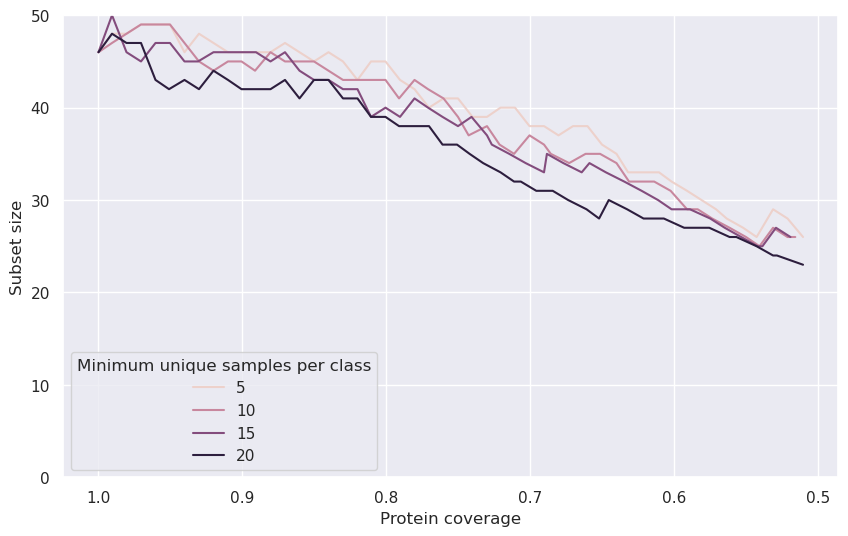

In [103]:
g = sns.lineplot(
    df_plot_concrete, x="coverage", y="subset_length", hue="min_unique_samples_per_term"
)
g.invert_xaxis()
g.set_ylim((0, df_plot["subset_length"].max()))
g.set_xlabel("Protein coverage")
g.set_ylabel("Subset size")
g.legend(title="Minimum unique samples per class")
plt.savefig("subset_size.png", dpi=300)

Best subset based on plots, mentioned in paper:

In [104]:
df_plot[(df_plot.min_unique_samples_per_term == 5) & (df_plot.nans == 0)].sort_values("coverage")

,min_samples_per_term,epsilon_f1,nan_value,verbose,excluded_terms,random_seed,return_scores,return_baseline_scores,dataset_name,min_coverage,min_unique_samples_per_term,prefer_abstract_terms,coverage,mean,median,std,nans,subset_length
393,20,0.0,-1.0,False,None,1,True,False,uniprot,0.51,5,False,0.51041,0.951294,0.963636,0.047643,0.0,26.0
392,20,0.0,-1.0,False,None,1,True,False,uniprot,0.51,5,True,0.51041,0.951294,0.963636,0.047643,0.0,26.0
384,20,0.0,-1.0,False,None,1,True,False,uniprot,0.52,5,True,0.521155,0.95053,0.962393,0.04845,0.0,28.0
385,20,0.0,-1.0,False,None,1,True,False,uniprot,0.52,5,False,0.521155,0.95053,0.962393,0.04845,0.0,28.0
376,20,0.0,-1.0,False,None,1,True,False,uniprot,0.53,5,True,0.531229,0.948724,0.960778,0.049599,0.0,29.0
377,20,0.0,-1.0,False,None,1,True,False,uniprot,0.53,5,False,0.531229,0.948724,0.960778,0.049599,0.0,29.0
369,20,0.0,-1.0,False,None,1,True,False,uniprot,0.54,5,False,0.542646,0.951482,0.963636,0.046856,0.0,26.0
368,20,0.0,-1.0,False,None,1,True,False,uniprot,0.54,5,True,0.542646,0.951482,0.963636,0.046856,0.0,26.0
361,20,0.0,-1.0,False,None,1,True,False,uniprot,0.55,5,False,0.552048,0.950725,0.963186,0.047852,0.0,27.0
360,20,0.0,-1.0,False,None,1,True,False,uniprot,0.55,5,True,0.552048,0.950725,0.963186,0.047852,0.0,27.0


In [105]:
# TODO pipeline that optimizes pipeline
# TODO max samples per term (make histogram)

# - Try all combinations of parameters
# - Filter all cases with nans
# - sort by coverage threshold parameter, f1

In [ ]:
# The optimal subset:
# display(
#     df_plot_concrete[
#         (df_plot_concrete.min_unique_samples_per_term == 10)
#         & (df_plot_concrete.min_coverage == 0.98)
#     ].sort_values("coverage", ascending=False)
# )

# TODO what is the best subset for uniprot dataset? This is not it
    
best_subset, best_subset_scores = subset_pipeline(
    df_uniprot_goa=df_uniprot_goa,
    df_sequences=df_sequences,
    min_samples_per_term=20,
    epsilon_f1=0.0,
    nan_value=-1.0,
    verbose=False,
    excluded_terms=None,
    random_seed=1,
    return_scores=True,
    dataset_name="uniprot",
    return_baseline_scores=False,
    min_unique_samples_per_term=5,
    min_coverage=0.99,
    prefer_abstract_terms=False,
)


go_id_to_proteins = get_go_id_to_proteins(df_uniprot_goa=df_uniprot_goa)

# sorted([(go_id_to_term[go_id], len(go_id_to_proteins[go_id])) for go_id in best_subset])
        
print(best_subset_scores)

tmp = pd.DataFrame.from_records(
    sorted(
        [(go_id_to_term[go_id], len(go_id_to_proteins[go_id])) for go_id in best_subset]
    ),
    columns=["GO term", "Proteins"],
).set_index("GO term")
display(tmp)
print(tmp.to_latex())

coverage          0.990367
mean              0.792771
median            0.844721
std               0.170199
nans              0.000000
subset_length    26.000000
dtype: float64


,Proteins
GO term,
ATPase-coupled transmembrane transporter activity,197
amide transmembrane transporter activity,104
amino acid transmembrane transporter activity,168
azole transmembrane transporter activity,22
carbohydrate derivative transmembrane transporter activity,104
carbohydrate transmembrane transporter activity,138
channel activity,452
dicarboxylic acid transmembrane transporter activity,45
efflux transmembrane transporter activity,48


\begin{tabular}{lr}
\toprule
 & Proteins \\
GO term &  \\
\midrule
ATPase-coupled transmembrane transporter activity & 197 \\
amide transmembrane transporter activity & 104 \\
amino acid transmembrane transporter activity & 168 \\
azole transmembrane transporter activity & 22 \\
carbohydrate derivative transmembrane transporter activity & 104 \\
carbohydrate transmembrane transporter activity & 138 \\
channel activity & 452 \\
dicarboxylic acid transmembrane transporter activity & 45 \\
efflux transmembrane transporter activity & 48 \\
inorganic anion transmembrane transporter activity & 156 \\
macromolecule transmembrane transporter activity & 80 \\
magnesium ion transmembrane transporter activity & 21 \\
monocarboxylic acid transmembrane transporter activity & 90 \\
nucleobase transmembrane transporter activity & 30 \\
nucleotide transmembrane transporter activity & 44 \\
organic cation transmembrane transporter activity & 60 \\
organic hydroxy compound transmembrane transporter acti

In [ ]:
import numpy as np
from subpred.overlap_matrix import get_go_overlap_matrix, plot_go_overlap_matrix

df_go_overlaps = get_go_overlap_matrix(
    df_uniprot_goa=df_uniprot_goa, exclude_iea=EXCLUDE_IEA_GO_TERMS
)

sns.set_theme(rc={"figure.figsize": (24, 12)})


def get_overlap_plot(subset, df_go_overlaps=df_go_overlaps, filename=None):
    # the percentage of proteins annotated with GO term 1 (x axis) that is also annotated with GO term2
    best_subset_overlaps = df_go_overlaps.loc[subset, subset].rename(
        columns=go_id_to_term, index=go_id_to_term
    )
    best_subset_overlaps = best_subset_overlaps.loc[
        sorted(best_subset_overlaps.index), sorted(best_subset_overlaps.columns)
    ]

    best_subset_overlaps = best_subset_overlaps / np.diag(best_subset_overlaps)

    tmp = best_subset_overlaps.copy()
    np.fill_diagonal(tmp.values, 0)
    print("median", tmp.median(axis=None).round(2))
    print("mean", tmp.mean(axis=None).round(2))

    g = sns.heatmap(best_subset_overlaps, annot=True, fmt=".2f")
    g.set_xlabel("GO term 1")
    g.set_ylabel("GO term 2")
    if filename:
        plt.savefig(filename, dpi=300, bbox_inches="tight")
    return g

median 0.0
mean 0.05


<Axes: xlabel='GO term 1', ylabel='GO term 2'>

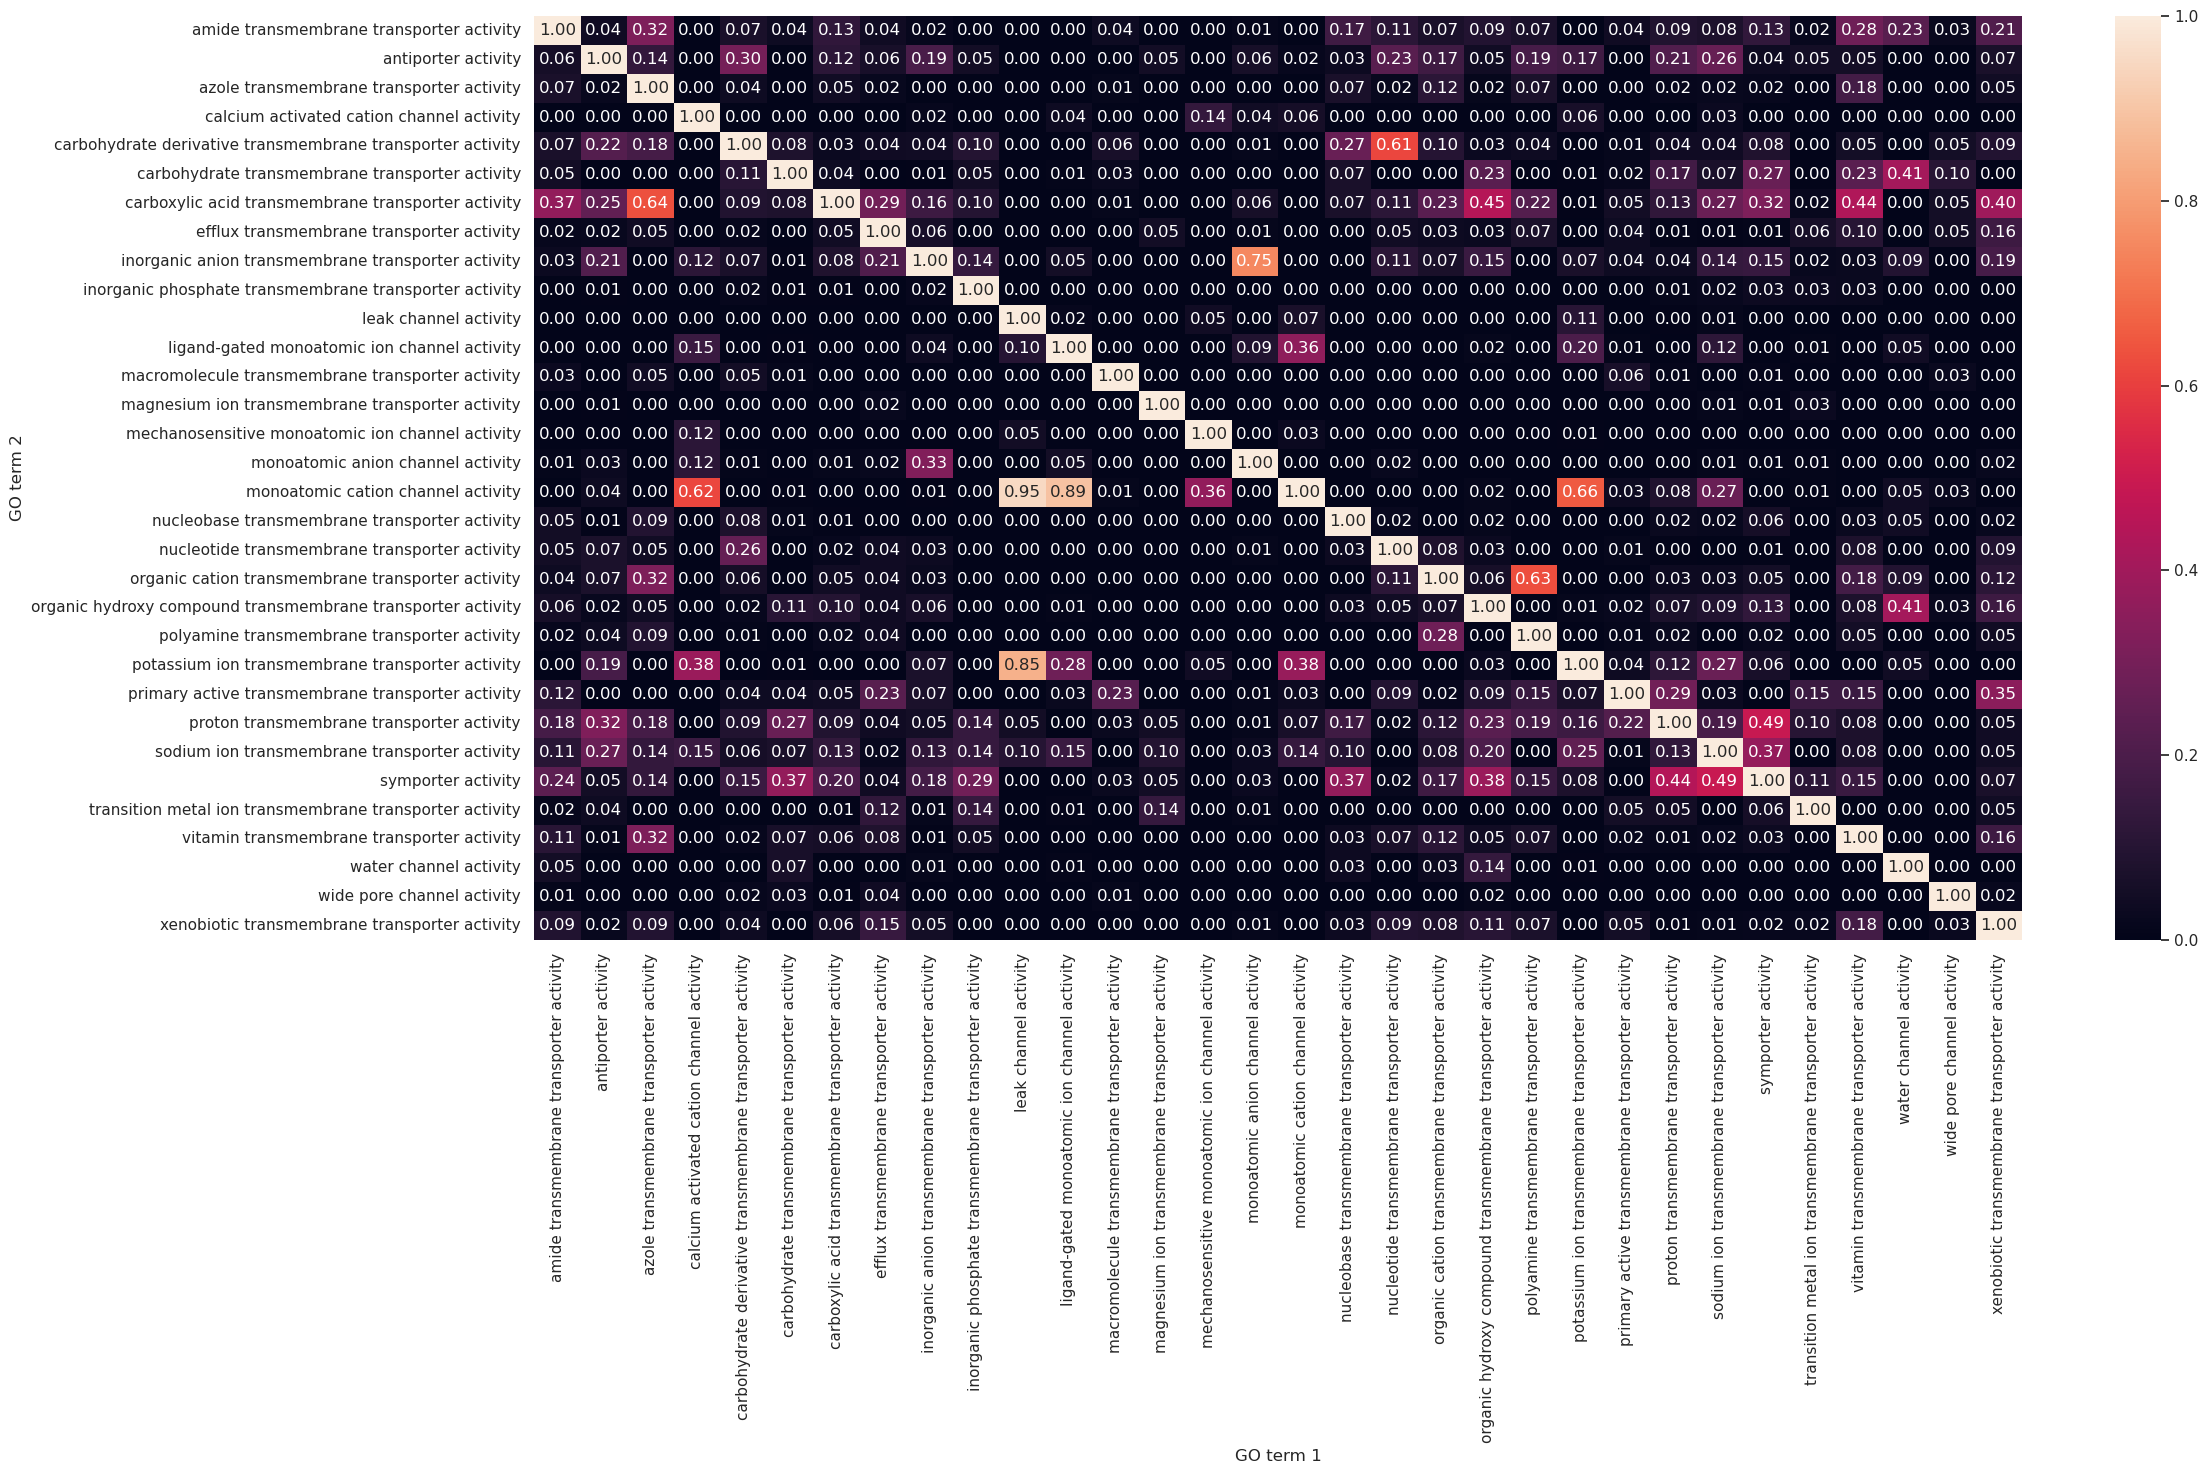

In [ ]:
get_overlap_plot(best_subset, filename="overlaps-concrete.png")

The same parameters, but preferring abstract terms:

In [ ]:
# The optimal subset when preferring abstract terms: TODO other result?
best_subset_abstract, best_subset_scores_abstract = subset_pipeline(
    df_uniprot_goa=df_uniprot_goa,
    df_sequences=df_sequences,
    min_samples_per_term=20,
    epsilon_f1=0.0,
    nan_value=-1.0,
    verbose=False,
    excluded_terms=None,
    random_seed=1,
    return_scores=True,
    return_baseline_scores=False,
    min_unique_samples_per_term=10,
    min_coverage=0.98,
    prefer_abstract_terms=True,
    dataset_name = "uniprot"
)

sorted(
    [
        (go_id_to_term[go_id], len(go_id_to_proteins[go_id]))
        for go_id in best_subset_abstract
    ]
)

[('amide transmembrane transporter activity', 104),
 ('antiporter activity', 140),
 ('azole transmembrane transporter activity', 22),
 ('calcium activated cation channel activity', 26),
 ('carbohydrate derivative transmembrane transporter activity', 104),
 ('carbohydrate transmembrane transporter activity', 138),
 ('carboxylic acid transmembrane transporter activity', 302),
 ('efflux transmembrane transporter activity', 48),
 ('inorganic anion transmembrane transporter activity', 156),
 ('inorganic phosphate transmembrane transporter activity', 21),
 ('ligand-gated monoatomic ion channel activity', 110),
 ('macromolecule transmembrane transporter activity', 80),
 ('magnesium ion transmembrane transporter activity', 21),
 ('mechanosensitive monoatomic ion channel activity', 22),
 ('monoatomic anion channel activity', 68),
 ('monoatomic cation channel activity', 274),
 ('narrow pore channel activity', 20),
 ('nucleobase transmembrane transporter activity', 30),
 ('nucleotide transmembran

No difference.

What about the other parameters? Can optimizing all other parameters (except min_coverage) improve results?

In [ ]:
# generating results for parameter combinations:
param_grid = {
    "epsilon_f1": [0.0, 0.001, 0.005, 0.01],
    "random_seed": list(range(1, 10)),
    "prefer_abstract_terms": [True, False],
    # "min_unique_samples_per_term": [5, 10, 15, 20],
    "nan_value": [-1, 0],
    "min_coverage": [1.0, 0.99, 0.98],
}
res = Parallel(n_jobs=-3, backend="multiprocessing")(
    delayed(save_params)(
        df_uniprot_goa=df_uniprot_goa,
        df_sequences=df_sequences,
        min_samples_per_term=20,
        min_unique_samples_per_term=10,
        verbose=False,
        excluded_terms=None,
        return_scores=True,
        dataset_name="uniprot",
        return_baseline_scores=False,
        **parameter_set
    )
    for parameter_set in ParameterGrid(param_grid=param_grid)
)
df_random = pd.concat(res, axis=1).T.reset_index(drop=True)
df_random_nonan = df_random[(df_random.nans == 0)]
df_random_nonan_abstract = df_random_nonan[
    df_random_nonan.prefer_abstract_terms == True
]
df_random_nonan_concrete = df_random_nonan[
    df_random_nonan.prefer_abstract_terms == False
]

In [ ]:
df_random_nonan.groupby(["prefer_abstract_terms", "epsilon_f1"]).mean()

min_samples_per_term  \
prefer_abstract_terms epsilon_f1                        
False                 0.000                      20.0   
                      0.001                      20.0   
                      0.005                      20.0   
                      0.010                      20.0   
True                  0.000                      20.0   
                      0.001                      20.0   
                      0.005                      20.0   
                      0.010                      20.0   

                                 min_unique_samples_per_term verbose  \
prefer_abstract_terms epsilon_f1                                       
False                 0.000                             10.0     0.0   
                      0.001                             10.0     0.0   
                      0.005                             10.0     0.0   
                      0.010                             10.0     0.0   
True                  0.000                             10.0     0.0   
                      0.001                             10.0     0.0   
                      0.005                             10.0     0.0   
                      0.010                             10.0     0.0   

                                 excluded_terms return_scores  \
prefer_abstract_terms epsilon_f1                                
False                 0.000                 NaN           1.0   
                      0.001                 NaN           1.0   
                      0.005                 NaN           1.0   
                      0.010                 NaN           1.0   
True                  0.000                 NaN           1.0   
                      0.001                 NaN           1.0   
                      0.005                 NaN           1.0   
                      0.010                 NaN           1.0   

                                 return_baseline_scores min_coverage  \
prefer_abstract_terms epsilon_f1                                       
False                 0.000                         0.0         0.98   
                      0.001                         0.0         0.98   
                      0.005                         0.0         0.98   
                      0.010                         0.0         0.98   
True                  0.000                         0.0         0.98   
                      0.001                         0.0         0.98   
                      0.005                         0.0     0.984375   
                      0.010                         0.0     0.983636   

                                 nan_value random_seed  coverage      mean  \
prefer_abstract_terms epsilon_f1                                             
False                 0.000           -1.0         5.0  0.980645  0.806333   
                      0.001           -0.5         5.0  0.980645   0.80632   
                      0.005        -0.5625       5.375  0.980645   0.80609   
                      0.010           -0.5         5.0  0.980645   0.80609   
True                  0.000           -1.0         5.0  0.980645  0.806333   
                      0.001           -1.0         5.0  0.980645   0.80413   
                      0.005        -0.9375      5.0625  0.984879  0.801647   
                      0.010      -0.909091    4.909091  0.984164  0.802066   

                                    median       std nans subset_length  
prefer_abstract_terms epsilon_f1                                         
False                 0.000       0.872172  0.163179  0.0          11.0  
                      0.001       0.872172  0.163168  0.0          11.0  
                      0.005       0.872172  0.162979  0.0          11.0  
                      0.010       0.872172  0.162979  0.0          11.0  
True                  0.000       0.872172  0.163179  0.0          11.0  
                      0.001        0.86172  0.168157  0.0          11.

In [ ]:
df_random_nonan.groupby(["prefer_abstract_terms", "epsilon_f1"]).max()

min_samples_per_term  \
prefer_abstract_terms epsilon_f1                        
False                 0.000                        20   
                      0.001                        20   
                      0.005                        20   
                      0.010                        20   
True                  0.000                        20   
                      0.001                        20   
                      0.005                        20   
                      0.010                        20   

                                 min_unique_samples_per_term verbose  \
prefer_abstract_terms epsilon_f1                                       
False                 0.000                               10   False   
                      0.001                               10   False   
                      0.005                               10   False   
                      0.010                               10   False   
True                  0.000                               10   False   
                      0.001                               10   False   
                      0.005                               10   False   
                      0.010                               10   False   

                                 excluded_terms return_scores  \
prefer_abstract_terms epsilon_f1                                
False                 0.000                 NaN          True   
                      0.001                 NaN          True   
                      0.005                 NaN          True   
                      0.010                 NaN          True   
True                  0.000                 NaN          True   
                      0.001                 NaN          True   
                      0.005                 NaN          True   
                      0.010                 NaN          True   

                                 return_baseline_scores min_coverage  \
prefer_abstract_terms epsilon_f1                                       
False                 0.000                       False         0.98   
                      0.001                       False         0.98   
                      0.005                       False         0.98   
                      0.010                       False         0.98   
True                  0.000                       False         0.98   
                      0.001                       False         0.98   
                      0.005                       False         0.99   
                      0.010                       False         0.99   

                                 nan_value random_seed  coverage      mean  \
prefer_abstract_terms epsilon_f1                                             
False                 0.000             -1           9  0.980645  0.806333   
                      0.001              0           9  0.980645  0.806333   
                      0.005              0           9  0.980645   0.80609   
                      0.010              0           9  0.980645   0.80609   
True                  0.000             -1           9  0.980645  0.806333   
                      0.001             -1           9  0.980645   0.80413   
                      0.005              0           9  0.990323   0.80413   
                      0.010              0           9  0.990323   0.80413   

                                    median       std nans subset_length  
prefer_abstract_terms epsilon_f1                                         
False                 0.000       0.872172  0.163179  0.0          11.0  
                      0.001       0.872172  0.163179  0.0          11.0  
                      0.005       0.872172  0.162979  0.0          11.0  
                      0.010       0.872172  0.162979  0.0          11.0  
True                  0.000       0.872172  0.163179  0.0          11.0  
                      0.001        0.86172  0.168157  0.0          11.

variance between random seeds

In [ ]:
df_random_nonan[
    ["random_seed", "coverage", "mean", "median", "std", "subset_length"]
].groupby("random_seed").mean()

,coverage,mean,median,std,subset_length
random_seed,,,,,
1,0.981525,0.80495,0.869451,0.166399,11.0
2,0.98139,0.804975,0.869066,0.166271,11.0
3,0.980645,0.805599,0.869036,0.164613,11.0
4,0.982258,0.804572,0.870668,0.167455,11.0
5,0.981525,0.805128,0.870401,0.165928,11.0
6,0.982134,0.804519,0.869979,0.167494,11.0
7,0.981452,0.805045,0.869678,0.166114,11.0
8,0.981452,0.805045,0.869678,0.166114,11.0
9,0.982258,0.804572,0.870668,0.167455,11.0


variance between abstract, non-abstract

In [ ]:
df_random_nonan[
    [
        "prefer_abstract_terms",
        "coverage",
        "mean",
        "median",
        "std",
        "nans",
        "subset_length",
    ]
].groupby("prefer_abstract_terms").mean()

,coverage,mean,median,std,nans,subset_length
prefer_abstract_terms,,,,,,
False,0.980645,0.806194,0.872172,0.163064,0.0,11.0
True,0.983011,0.803183,0.866714,0.171098,0.0,11.0


maximum:

In [ ]:
df_random_nonan[
    [
        "prefer_abstract_terms",
        "coverage",
        "mean",
        "median",
        "std",
        "nans",
        "subset_length",
    ]
].groupby("prefer_abstract_terms").max()

,coverage,mean,median,std,nans,subset_length
prefer_abstract_terms,,,,,,
False,0.980645,0.806333,0.872172,0.163179,0.0,11.0
True,0.990323,0.806333,0.8736,0.184259,0.0,11.0


Which subset has the higher coverage?

{'min_samples_per_term': 20,
 'min_unique_samples_per_term': 10,
 'verbose': False,
 'excluded_terms': None,
 'return_scores': True,
 'return_baseline_scores': False,
 'epsilon_f1': 0.005,
 'min_coverage': 0.99,
 'nan_value': -1,
 'prefer_abstract_terms': True,
 'random_seed': 1}

coverage          0.990323
mean              0.798454
median            0.873600
std               0.184259
nans              0.000000
subset_length    11.000000
dtype: float64


,GO term,Proteins
0,amide transmembrane transporter activity,21
1,carbohydrate derivative transmembrane transpor...,25
2,inorganic molecular entity transmembrane trans...,158
3,macromolecule transmembrane transporter activity,21
4,monoatomic ion transmembrane transporter activity,142
5,organic acid transmembrane transporter activity,65
6,organophosphate ester transmembrane transporte...,22
7,primary active transmembrane transporter activity,61
8,salt transmembrane transporter activity,72
9,secondary active transmembrane transporter act...,80


\begin{tabular}{lr}
\toprule
 & Proteins \\
GO term &  \\
\midrule
amide transmembrane transporter activity & 21 \\
carbohydrate derivative transmembrane transporter activity & 25 \\
inorganic molecular entity transmembrane transporter activity & 158 \\
macromolecule transmembrane transporter activity & 21 \\
monoatomic ion transmembrane transporter activity & 142 \\
organic acid transmembrane transporter activity & 65 \\
organophosphate ester transmembrane transporter activity & 22 \\
primary active transmembrane transporter activity & 61 \\
salt transmembrane transporter activity & 72 \\
secondary active transmembrane transporter activity & 80 \\
sulfur compound transmembrane transporter activity & 21 \\
\bottomrule
\end{tabular}

median 0.1
mean 0.16


<Axes: xlabel='GO term 1', ylabel='GO term 2'>

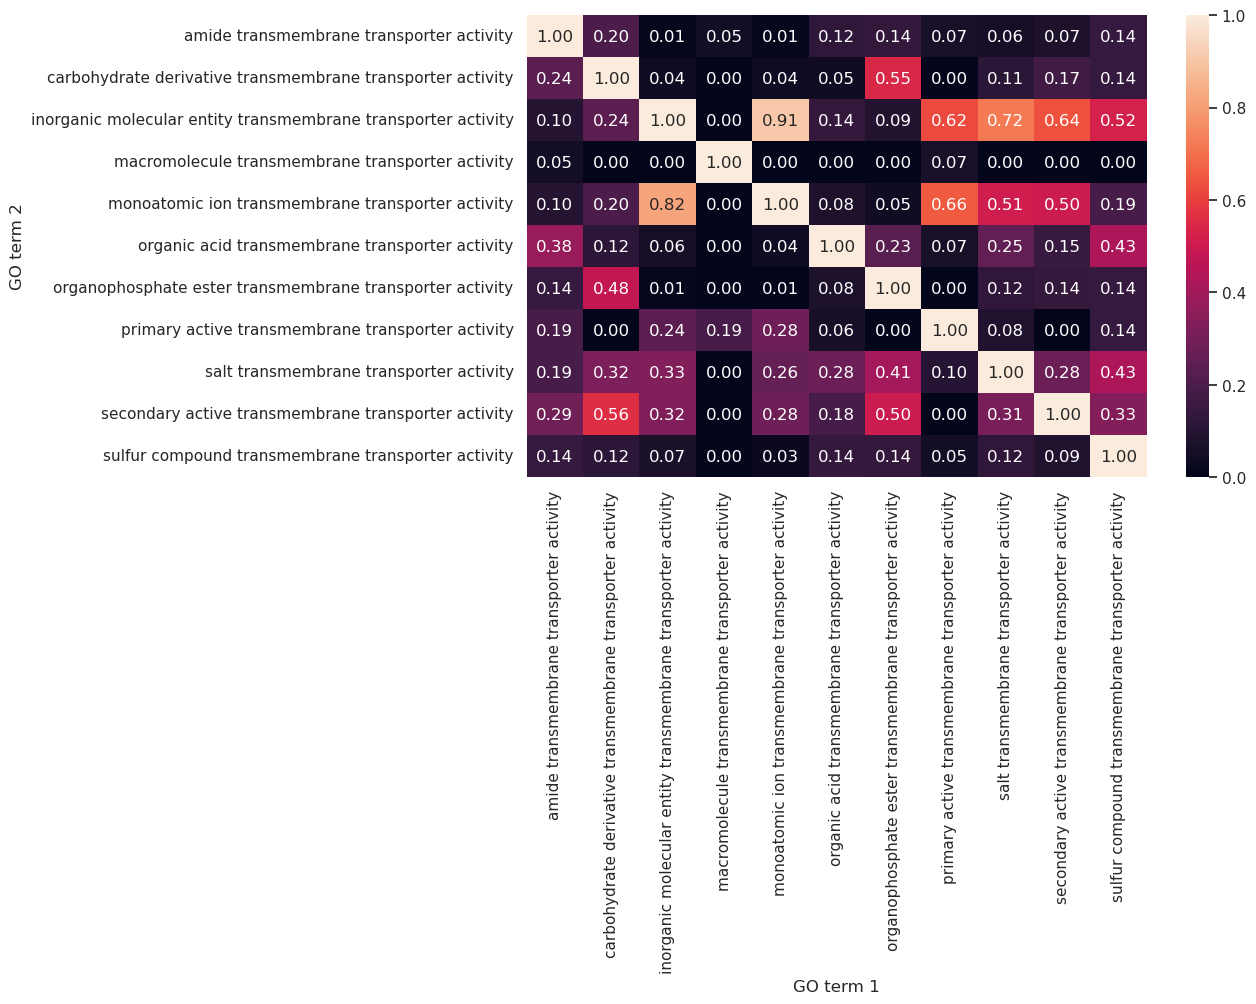

In [ ]:
params = (
    df_random_nonan_abstract[
        df_random_nonan_abstract.coverage == df_random_nonan_abstract.coverage.max()
    ]
    .iloc[0, :11]
    .to_dict()
)
display(params)
subset_higher_coverage, subset_higher_coverage_scores = subset_pipeline(
    df_uniprot_goa, df_sequences, **params
)

tmp = pd.DataFrame.from_records(
    sorted(
        [
            (go_id_to_term[go_id], len(go_id_to_proteins[go_id]))
            for go_id in subset_higher_coverage
        ]
    ),
    columns=["GO term", "Proteins"],
)

print(subset_higher_coverage_scores)
display(tmp)

print(tmp.set_index("GO term").to_latex())

get_overlap_plot(subset_higher_coverage, filename="overlaps-abstract.png")

variances epsilon

In [ ]:
df_random_nonan[
    ["epsilon_f1", "coverage", "mean", "median", "std", "nans", "subset_length"]
].groupby("epsilon_f1").mean()

,coverage,mean,median,std,nans,subset_length
epsilon_f1,,,,,,
0.000,0.980645,0.806333,0.872172,0.163179,0.0,11.0
0.001,0.980645,0.80559,0.868688,0.164831,0.0,11.0
0.005,0.982762,0.803869,0.869544,0.16909,0.0,11.0
0.010,0.98198,0.804564,0.869846,0.167164,0.0,11.0


correlations

In [ ]:
df_random_nonan.drop(
    [
        "min_samples_per_term",
        "min_unique_samples_per_term",
        "verbose",
        "excluded_terms",
        "return_scores",
        "return_baseline_scores",
        "nans",
    ],
    axis=1,
).corr("kendall").round(2)

,epsilon_f1,min_coverage,nan_value,prefer_abstract_terms,random_seed,coverage,mean,median,std,subset_length
epsilon_f1,1.00,0.20,0.17,-0.02,0.00,0.20,-0.49,0.01,-0.10,NaN
min_coverage,0.20,1.00,-0.13,0.40,0.05,1.00,-0.51,0.61,0.51,NaN
nan_value,0.17,-0.13,1.00,-0.41,0.00,-0.13,0.15,0.15,-0.36,NaN
prefer_abstract_terms,-0.02,0.40,-0.41,1.00,-0.02,0.40,-0.57,-0.31,0.76,NaN
random_seed,0.00,0.05,0.00,-0.02,1.00,0.05,-0.01,0.07,-0.01,NaN
coverage,0.20,1.00,-0.13,0.40,0.05,1.00,-0.51,0.61,0.51,NaN
mean,-0.49,-0.51,0.15,-0.57,-0.01,-0.51,1.00,0.21,-0.39,NaN
median,0.01,0.61,0.15,-0.31,0.07,0.61,0.21,1.00,-0.21,NaN
std,-0.10,0.51,-0.36,0.76,-0.01,0.51,-0.39,-0.21,1.00,NaN
subset_length,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
